<a href="https://colab.research.google.com/github/PrachitiSParulekar/ml-linear-models/blob/main/svm_linear.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [26]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import pandas as pd

plt.style.use('default')
sns.set_palette("husl")

In [27]:
# 1. Generate synthetic data
X_linear, y_linear = make_classification(
    n_samples=200, n_features=2, n_redundant=0,
    n_informative=2, n_clusters_per_class=1,
    random_state=42
)

In [28]:
# 2. Split data
X_train, X_test, y_train, y_test = train_test_split(
    X_linear, y_linear, test_size=0.3, random_state=42
)

In [29]:
# 3. Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [30]:
# 4. Train SVM
svm_linear = SVC(kernel='linear', C=1.0, random_state=42)
svm_linear.fit(X_train_scaled, y_train)
y_pred = svm_linear.predict(X_test_scaled)
accuracy = accuracy_score(y_test, y_pred)
print(f"Linear SVM Accuracy: {accuracy:.4f}")
print(f"Support Vectors: {svm_linear.n_support_}")

Linear SVM Accuracy: 0.8667
Support Vectors: [30 29]


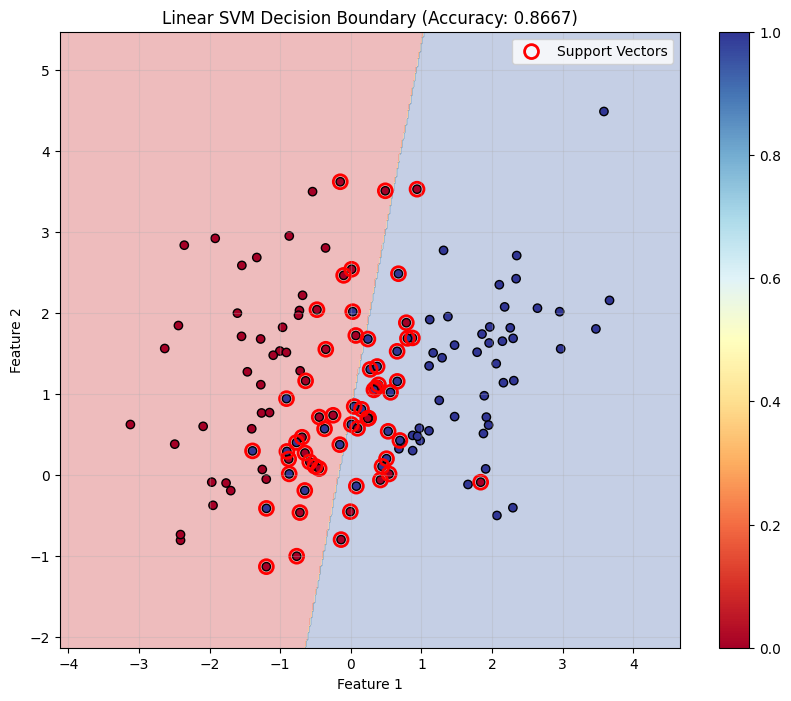

In [31]:
# 5. Plot decision boundary
plt.figure(figsize=(10, 8))
X_plot = scaler.inverse_transform(X_train_scaled)

# Generate the mesh grid for contour plot
h = 0.02
x_min, x_max = X_plot[:, 0].min() - 1, X_plot[:, 0].max() + 1
y_min, y_max = X_plot[:, 1].min() - 1, X_plot[:, 1].max() + 1
xx, yy = np.meshgrid(
    np.arange(x_min, x_max, h),
    np.arange(y_min, y_max, h)
)
mesh_points = np.c_[xx.ravel(), yy.ravel()]
mesh_points_scaled = scaler.transform(mesh_points)

Z = svm_linear.predict(mesh_points_scaled)
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, alpha=0.3, cmap=plt.cm.RdYlBu)

# Plot training points
scatter = plt.scatter(X_plot[:, 0], X_plot[:, 1], c=y_train, cmap=plt.cm.RdYlBu, edgecolors='black')

# Highlight support vectors
support_vectors = scaler.inverse_transform(svm_linear.support_vectors_)
plt.scatter(
    support_vectors[:, 0], support_vectors[:, 1],
    s=100, facecolors='none', edgecolors='red', linewidth=2, label='Support Vectors'
)

plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title(f'Linear SVM Decision Boundary (Accuracy: {accuracy:.4f})')
plt.legend()
plt.colorbar(scatter)
plt.grid(True, alpha=0.3)
plt.show()